## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [10]:
gdp_df.shape

(8219, 4)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1)

In [13]:
gdp_df = gdp_df.set_axis(['Country', 'Year', 'GDP_Per_Capita'], axis=1)

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [16]:
table = gdp_df.pivot_table(gdp_df, index =['Year', 'Country'])

In [17]:
table

GDP_Per_Capita
Year Country                                    
1990 Africa Eastern and Southern     3386.854480
     Africa Western and Central      3299.401375
     Albania                         5327.747458
     Algeria                        11728.545729
     Andorra                        50036.300776
...                                          ...
2023 Viet Nam                       13491.879417
     West Bank and Gaza              5313.097903
     World                          20604.121950
     Zambia                          3673.484197
     Zimbabwe                        3442.251327

[8219 rows x 1 columns]

In [18]:
yearcounts = gdp_df.groupby(['Country'])['Year'].count()
yearcounts.reset_index()

,Country,Year
0,Afghanistan,24
1,Africa Eastern and Southern,34
2,Africa Western and Central,34
3,Albania,34
4,Algeria,34
...,...,...
242,Virgin Islands,21
243,West Bank and Gaza,30
244,World,34
245,Zambia,34


In [19]:
total_years = gdp_df['Year'].nunique()
print(f"Total number of unique years: {total_years}")

Total number of unique years: 34


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [21]:
graphs_2020 = gdp_df[gdp_df["Year"] == 2020]

In [22]:
graphs_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

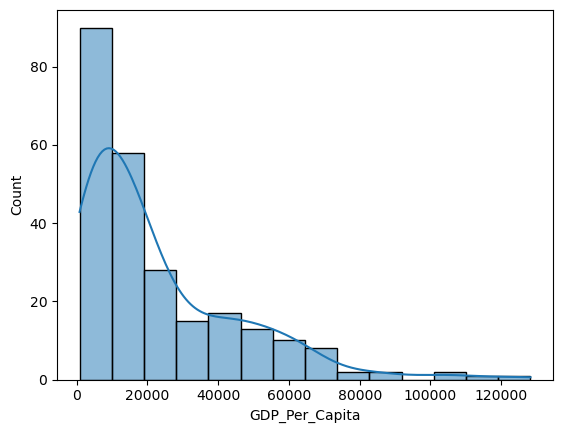

In [23]:
sns.histplot(data=graphs_2020, x="GDP_Per_Capita", kde=True)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

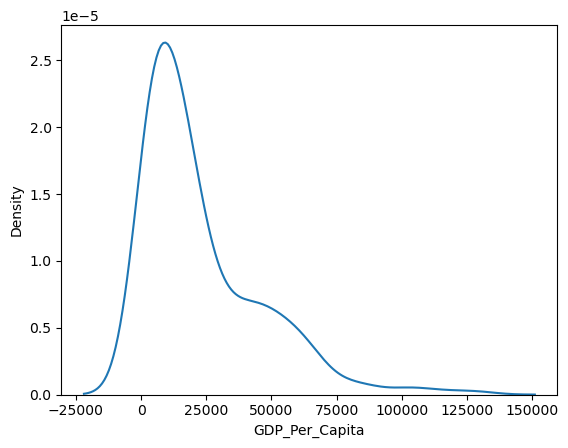

In [24]:
sns.kdeplot(data=graphs_2020, x="GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita'>

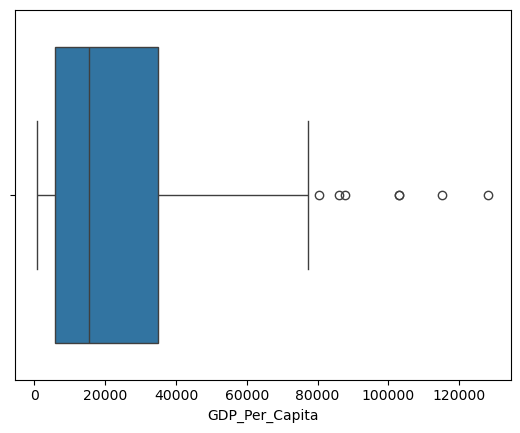

In [25]:
sns.boxplot(x=graphs_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

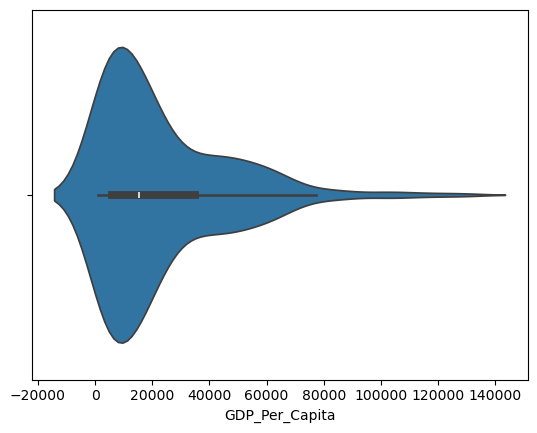

In [26]:
sns.violinplot(x=graphs_2020["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [28]:
graphs_2020["GDP_Per_Capita"].median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [30]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])]

In [31]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

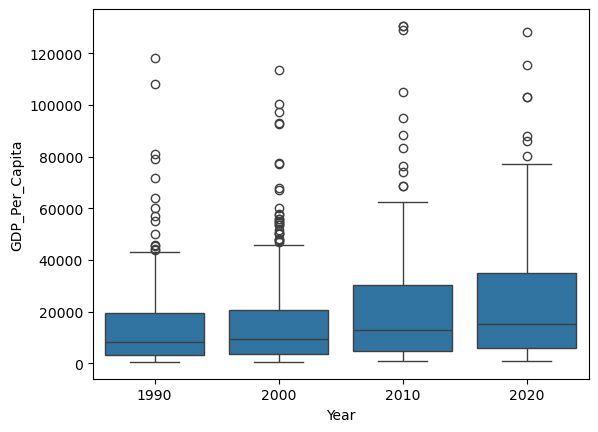

In [32]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

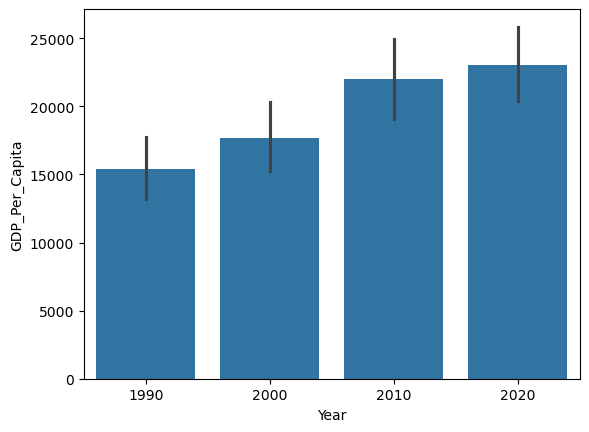

In [33]:
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

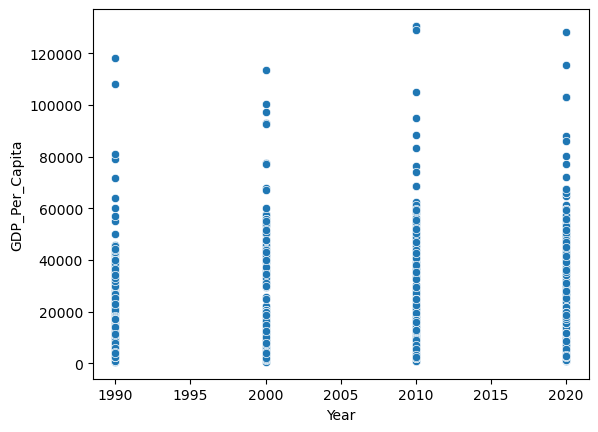

In [34]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

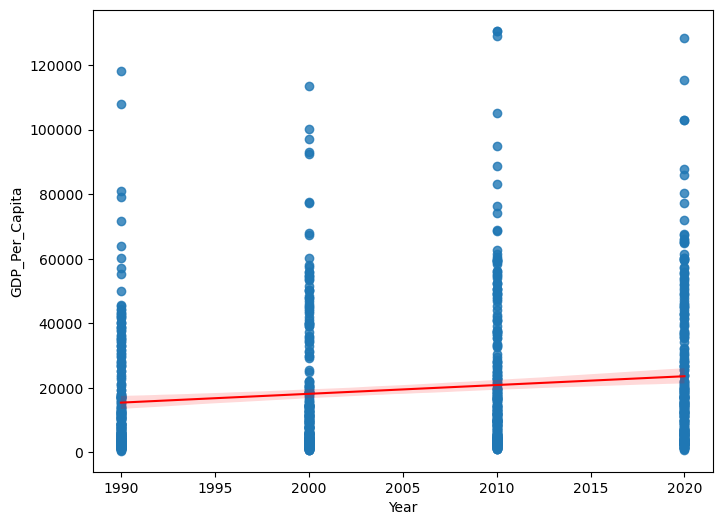

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)
plt.show()

## GDP has increased by decade ##

11. Which country was the first to have a GDP per capita greater than $100,000?

In [38]:
gdp_df[gdp_df["GDP_Per_Capita"] > 100000].sort_values("Year")

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512
...,...,...,...
6116,Qatar,2023,116159.142559
4457,"Macao SAR, China",2023,104961.643485
6511,Singapore,2023,127543.554752
4423,Luxembourg,2023,130373.477942


UAE and Brunei broke 100K first

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [41]:
gdp_df[gdp_df["Year"] == 2020].sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


Luxembourg had the highest GDP in 2020

In [43]:
lux_gdp = gdp_df[gdp_df["Country"] == "Luxembourg"]

In [44]:
lux_gdp.head()

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

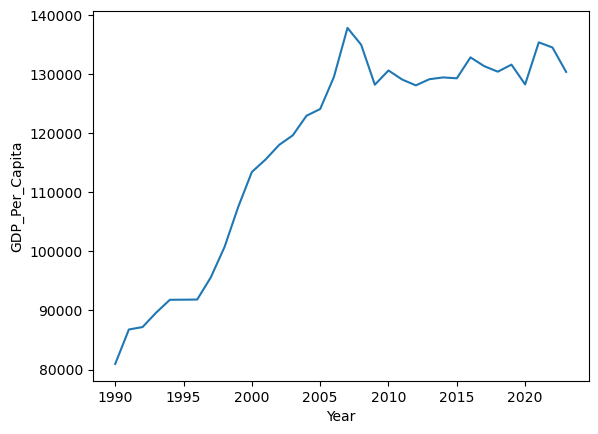

In [45]:
sns.lineplot(data=lux_gdp, x="Year", y="GDP_Per_Capita")

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [47]:
gdp_df[gdp_df["Year"] == 2020].sort_values("GDP_Per_Capita", ascending=True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [48]:
buru_gdp = gdp_df[gdp_df["Country"] == "Burundi"]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

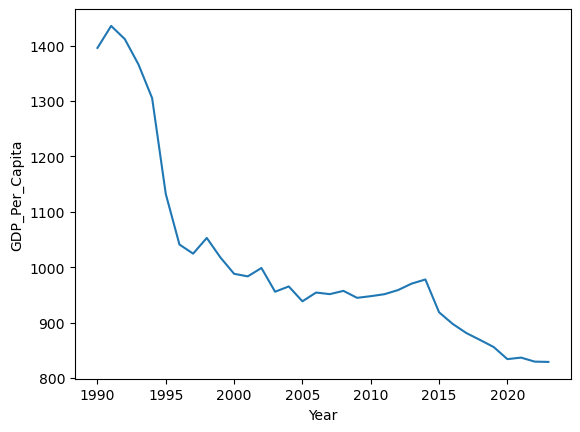

In [49]:
sns.lineplot(data=buru_gdp, x="Year", y="GDP_Per_Capita")

In [50]:
comparison_90 = gdp_df[gdp_df["Year"] == 1990]

In [51]:
comparison_90.sort_values("Country")

,Country,Year,GDP_Per_Capita
57,Africa Eastern and Southern,1990,3386.854480
91,Africa Western and Central,1990,3299.401375
125,Albania,1990,5327.747458
159,Algeria,1990,11728.545729
193,Andorra,1990,50036.300776
...,...,...,...
8031,Vanuatu,1990,3101.680551
8065,Viet Nam,1990,2467.964601
8150,World,1990,11207.386344
8184,Zambia,1990,2425.111287


In [52]:
comparison_20 = gdp_df[gdp_df["Year"] == 2020]

In [53]:
comparison_20.sort_values("Country")

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [54]:
merged_comp = pd.merge(comparison_90, comparison_20, on='Country', how='inner')

In [55]:
merged_comp.head()

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990,3386.854480,2020,3861.111238
1,Africa Western and Central,1990,3299.401375,2020,4622.731427
2,Albania,1990,5327.747458,2020,14650.395929
3,Algeria,1990,11728.545729,2020,14194.155748
4,Andorra,1990,50036.300776,2020,55488.490299


In [56]:
merged_comp["90_greater"] = merged_comp["GDP_Per_Capita_x"] > merged_comp["GDP_Per_Capita_y"]

In [57]:
ninety_greater = merged_comp[merged_comp["90_greater"] == True]

In [58]:
ninety_greater

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y,90_greater
10,Aruba,1990,34579.220640,2020,28521.688852,True
16,Barbados,1990,16976.761648,2020,15749.038017,True
27,Brunei,1990,118163.683198,2020,80280.897948,True
30,Burundi,1990,1396.077627,2020,833.920257,True
37,Central African Republic,1990,1481.252551,2020,1136.570530,True
44,Congo,1990,8699.526839,2020,6350.509134,True
49,Dem. Rep. Congo,1990,2172.001597,2020,1277.632863,True
71,Fragile and conflict affected situations,1990,6062.707946,2020,5271.014406,True
73,Gabon,1990,23884.810700,2020,18681.484074,True
84,Haiti,1990,3946.365646,2020,3229.475544,True


Above are a list of Countries where the 1990 GDP was greater than the 2020 GDP 

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [61]:
internet_df = pd.read_csv('../data/internet_use.csv', header =0, nrows=6083)

In [62]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [64]:
internet_df = internet_df.drop("Value Footnotes", axis=1)

In [65]:
internet_df = internet_df.set_axis(['Country', 'Year', 'Internet_Users_Pct'], axis = 1)

16. Look at the number of observations in this dataset per year. What do you notice?

In [67]:
internet_df.groupby("Year")["Internet_Users_Pct"].count()

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Internet_Users_Pct, dtype: int64

Highest count in 1990, dips, and then steadily pick back up before it starts to drop again in 2018.

17. What is the first year to have a non-zero internet users percentage value?

In [83]:
internet_df[internet_df["Internet_Users_Pct"]>=1].sort_values("Year")

,Country,Year,Internet_Users_Pct
4196,Norway,1991,1.40740
5331,Switzerland,1991,1.17996
2000,Finland,1991,1.39744
305,Australia,1991,1.09720
5809,United States,1991,1.16319
...,...,...,...
2159,Germany,2023,92.47640
5266,Sweden,2023,95.70330
3323,Luxembourg,2023,99.34790
3141,Latvia,2023,92.18790


In [85]:
dist = internet_df[internet_df["Internet_Users_Pct"]>=1].sort_values("Year")

In [71]:
internet_df.pivot_table("Internet_Users_Pct", index = "Year")

,Internet_Users_Pct
Year,
1990,0.022270
1991,0.280305
1992,0.399037
1993,0.456738
1994,0.658381
1995,0.948402
1996,1.461103
1997,2.541564
1998,3.991141


The first non-zero pct users year was 1996

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [74]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int64  
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [75]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int64  
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [76]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [77]:
internet_df[internet_df["Year"].isin(["2014"])]

,Country,Year,Internet_Users_Pct


In [105]:
df_2000 = internet_df[internet_df["Year"] == 2000]

In [141]:
df_2000.avg("Internet_Users_Pct")

AttributeError: 'DataFrame' object has no attribute 'avg'

In [107]:
df_2014 = internet_df[internet_df["Year"] == 2014]

In [113]:
union_df = pd.concat([df_2000, df_2014])

In [121]:
union_df = union_df.sort_values("Year")

In [133]:
pd.pivot_table(union_df, values="Internet_Users_Pct", index=["Country", "Year"])

Internet_Users_Pct
Country     Year                    
Afghanistan 2014            7.000000
Albania     2000            0.114097
            2014           54.300000
Algeria     2000            0.491706
            2014           29.500000
...                              ...
Yemen       2014           22.550000
Zambia      2000            0.191072
            2014            6.500000
Zimbabwe    2000            0.401434
            2014           16.364700

[414 rows x 1 columns]

In [135]:
union_df_pivot = pd.pivot_table(union_df, values="Internet_Users_Pct", index=["Country", "Year"], columns=["Country"])

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.